In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Import Data File

In [16]:
# Read the Excel file
df = pd.read_excel('Data.xlsx', index_col=0)
print(df)

# Display the contents of the DataFrame
df.head()

             Open   High    Low  Close  rsi1 RSI
Time                                            
2020-12-30  43.25  43.25  42.25  42.50   58.5883
2020-12-29  41.25  42.50  41.00  42.50   58.5883
2020-12-28  42.25  42.75  41.00  41.00   52.4209
2020-12-25  41.25  42.25  41.25  42.00   57.7446
2020-12-24  40.75  41.50  40.75  41.25   54.5285
...           ...    ...    ...    ...       ...
2010-09-08  28.80  29.10  28.40  28.90       NaN
2010-09-07  29.80  29.90  29.20  29.20       NaN
2010-09-06  29.80  30.60  29.70  30.20       NaN
2010-09-03  27.50  29.20  27.50  29.10       NaN
2010-09-02  27.50  27.50  26.30  26.90       NaN

[2525 rows x 5 columns]


,Open,High,Low,Close,rsi1 RSI
Time,,,,,
2020-12-30,43.25,43.25,42.25,42.50,58.5883
2020-12-29,41.25,42.50,41.00,42.50,58.5883
2020-12-28,42.25,42.75,41.00,41.00,52.4209
2020-12-25,41.25,42.25,41.25,42.00,57.7446
2020-12-24,40.75,41.50,40.75,41.25,54.5285


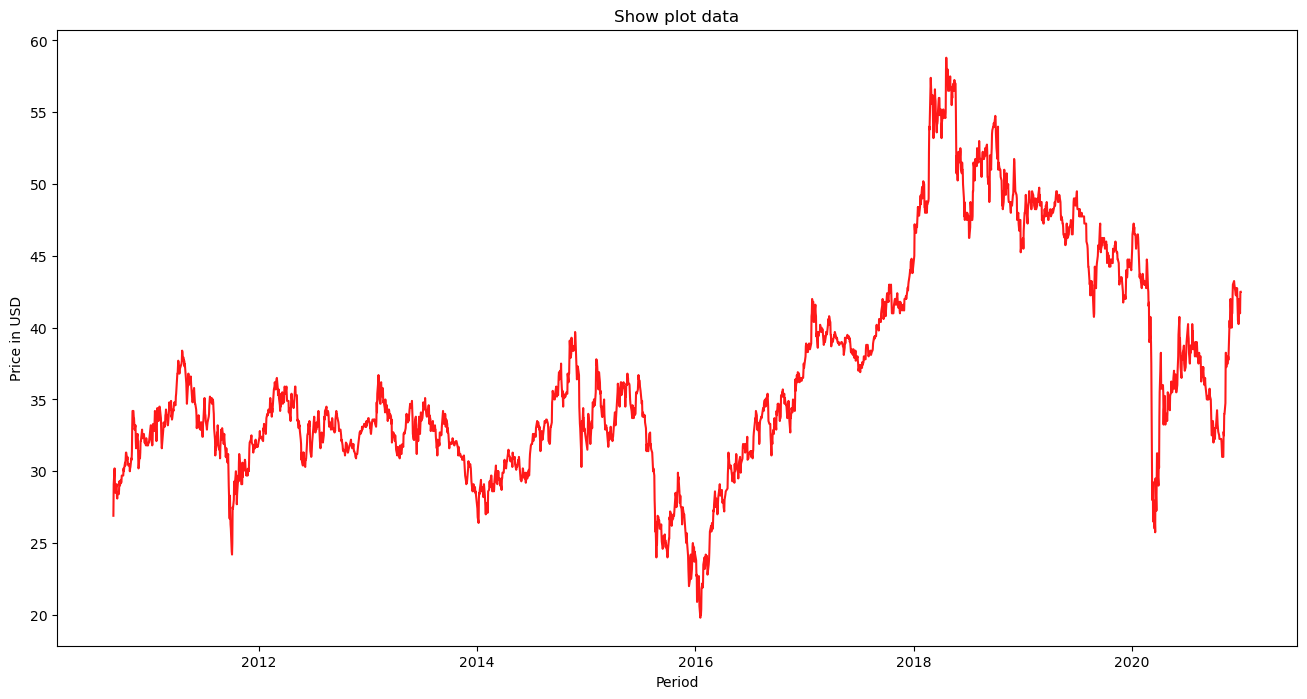

In [17]:
fig, ax = plt.subplots(figsize=(16,8))
plt.title("Show plot data")
plt.ylabel('Price in USD')
plt.xlabel('Period')
ax.plot(df['Close'], label = 'Close Price', alpha = 0.9, color = 'red')

# Create a function for trading

1.ผลสุดท้ายของเงินในวันสุดท้าย (Final Balance) :  512142.6499999998


2.มีการซื้อขายวันไหนบ้าง ได้กำไรหรือขาดทุนเท่าไหร่ในแต่ล่ะครั้งที่มีการซื้อขาย
Buy on 2020-11-17 00:00:00 at 37.50 Baht with 13333 shares.
Sell on 2020-10-08 00:00:00 at 33.00 Baht. Profit/Loss: 0.00 Baht.
Buy on 2020-06-12 00:00:00 at 37.25 Baht with 11812 shares.
Sell on 2020-06-05 00:00:00 at 39.50 Baht. Profit/Loss: 0.00 Baht.
Buy on 2020-05-15 00:00:00 at 35.50 Baht with 13143 shares.
Sell on 2020-03-02 00:00:00 at 39.25 Baht. Profit/Loss: 0.00 Baht.
Buy on 2019-12-16 00:00:00 at 43.50 Baht with 11858 shares.
Sell on 2019-11-15 00:00:00 at 44.75 Baht. Profit/Loss: 0.00 Baht.
Buy on 2019-10-16 00:00:00 at 45.00 Baht with 11793 shares.
Sell on 2019-08-06 00:00:00 at 45.50 Baht. Profit/Loss: 0.00 Baht.
Buy on 2019-06-04 00:00:00 at 46.50 Baht with 11539 shares.
Sell on 2019-05-02 00:00:00 at 49.00 Baht. Profit/Loss: 0.00 Baht.
Buy on 2019-04-01 00:00:00 at 48.00 Baht with 11779 shares.
Sell on 2018-12-11 00:00:00 a

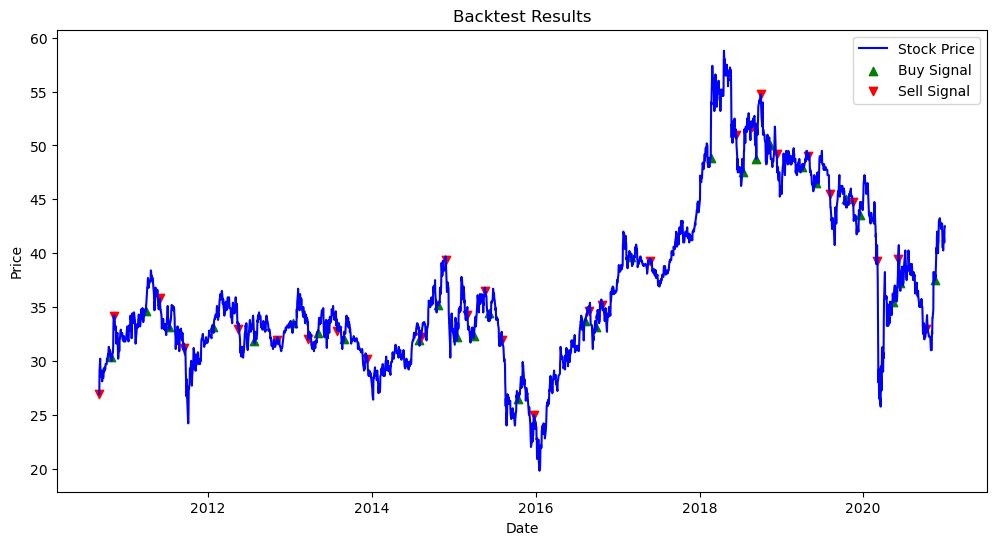

In [121]:


# backtesting ตั้งแต่ช่วงปี 2011 -2020 โดยมีเงื่อนไขดังนี้
def backtest_strategy(prices, 
                    #1. เงินเริ่มต้นอยู่ที่ 500,000 บาท
                    starting_balance=500000):
    balance = starting_balance
    shares = 0
    is_holding = False
    trade_records = []

    for i in range(1, len(prices)):
        rsi = calculate_rsi(prices[:i])

        # ตรวจสอบสัญญาณซื้อขาย
        # จะซื้อก็ต่อเมื่อ RSI < 30 โดยจะซื้อที่จำนวนมากที่สุดที่เงิน ณ ตอนนั้นสามารถซื้อได้
        if not is_holding and rsi < 30:
            shares_to_buy = int(balance / prices[i])
            balance -= shares_to_buy * prices[i]
            shares += shares_to_buy
            is_holding = True
            trade_records.append(("Buy", prices.index[i], prices[i], shares_to_buy))
        
        # จะขายก็ต่อเมื่อ RSI >70 ซึ่งจะขายทั้งหมดตามที่เราได้ถือมาจากสัญญาณก่อนหน้า
        elif is_holding and rsi > 70:
            balance += shares * prices[i]
            shares = 0
            is_holding = False
            trade_records.append(("Sell", prices.index[i], prices[i], shares))

    # ตรวจสอบว่ายังคงถือหุ้นอยู่หรือไม่ เพื่อทำการขายที่เหลือ (ถ้ามี)
    if is_holding:
        balance += shares * prices[-1]
        trade_records.append(("Sell", prices.index[-1], prices[-1], shares))
    
    return balance, trade_records

# ฟังก์ชันสำหรับคำนวณ RSI
def calculate_rsi(prices, period=14):
    delta = prices.diff()
    gain = delta.apply(lambda x: x if x > 0 else 0)
    loss = -delta.apply(lambda x: x if x < 0 else 0)
    
    # Average gain คือ ค่าเฉลี่ยของอัตราผลตอบแทนที่เป็นบวกย้อนหลัง 14 แท่งเทียน
    avg_gain = gain.rolling(window=period).mean()
    
    # Average loss คือ ค่าเฉลี่ยของอัตราผลตอบแทนที่เป็นลบย้อนหลัง 14 แท่งเทียน
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi.iloc[-1]

# โหลดข้อมูลราคาหุ้น
df = pd.read_excel('closeData.xlsx', parse_dates=['Date'], index_col='Date')

# ทำการ backtesting
final_balance, trades = backtest_strategy(df['Close'])

# 1. ผลสุดท้ายของเงินในวันสุดท้าย
print("1.ผลสุดท้ายของเงินในวันสุดท้าย (Final Balance) : ", final_balance)
print("\n")

# 2. แสดงวันที่มีการซื้อขายและกำไรหรือขาดทุนในแต่ละครั้ง

print("2.มีการซื้อขายวันไหนบ้าง ได้กำไรหรือขาดทุนเท่าไหร่ในแต่ล่ะครั้งที่มีการซื้อขาย")
for trade in trades:
    action, date, price, shares = trade
    if action == "Buy":
        print(f"Buy on {date} at {price:.2f} Baht with {shares} shares.")
    elif action == "Sell":
        print(f"Sell on {date} at {price:.2f} Baht. Profit/Loss: {shares * price:.2f} Baht.")

# 3. แสดงค่าสถิติที่ช่วยในการตัดสินใจ
# คำนวณค่าสถิติ
profitable_trades = [trade[3] * trade[2] for trade in trades if trade[0] == "Sell"]
loss_trades = [-trade[3] * trade[2] for trade in trades if trade[0] == "Buy"]
total_trades = len(profitable_trades) + len(loss_trades)
winning_rate = len(profitable_trades) / total_trades * 100 if total_trades > 0 else 0
average_profit_per_trade = sum(profitable_trades) / len(profitable_trades) if len(profitable_trades) > 0 else 0
average_loss_per_trade = sum(loss_trades) / len(loss_trades) if len(loss_trades) > 0 else 0
profit_factor = sum(profitable_trades) / abs(sum(loss_trades)) if sum(loss_trades) != 0 else 0

# พิมพ์ค่าสถิติ
print("\n3. Statistics:")
print(f"Total Trades: {total_trades}")
print(f"Winning Rate: {winning_rate:.2f}%")
print(f"Average Profit per Trade: {average_profit_per_trade:.2f} Baht")
print(f"Average Loss per Trade: {average_loss_per_trade:.2f} Baht")
print(f"Profit Factor: {profit_factor:.2f}")

# พล็อตกราฟราคาหุ้นและสัญญาณซื้อขาย
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Stock Price', color='b')
buy_signals = [trade[1] for trade in trades if trade[0] == "Buy"]
sell_signals = [trade[1] for trade in trades if trade[0] == "Sell"]
plt.scatter(buy_signals, df.loc[buy_signals]['Close'], marker='^', color='g', label='Buy Signal')
plt.scatter(sell_signals, df.loc[sell_signals]['Close'], marker='v', color='r', label='Sell Signal')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Backtest Results')
plt.show()


In [27]:
import pandas_ta as ta
!pip3 install pandas_datareader

                                              0.0/109.5 kB ? eta -:--:--
     -------------------------------------- 109.5/109.5 kB 6.2 MB/s eta 0:00:00


In [133]:
df = pd.read_excel('closeData.xlsx', parse_dates=['Date'], index_col=0)


# ข้อ 2 
หาค่า MACD(12,26,9) ตั้งแต่ช่วงปี 2011-2020
***อยากเห็นโค้ดมากกว่าผลลัพธ์***

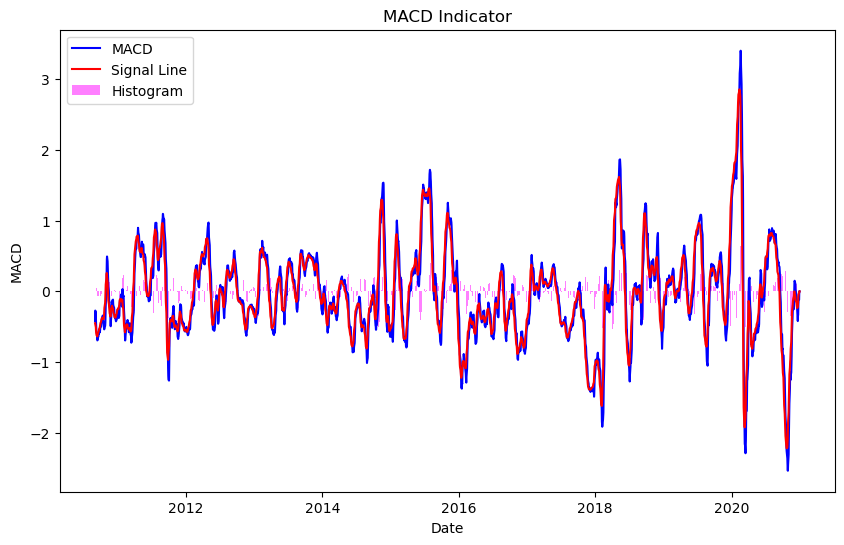

In [143]:
def calculate_MACD(
    # MACD(12,26,9) 
    df, short_window=12, long_window=26, signal_window=9):
  
    # EMA(12)
    short_ema = df['Close'].ewm(span=short_window, min_periods=1, adjust=False).mean()
    # EMA(26)
    long_ema = df['Close'].ewm(span=long_window, min_periods=1, adjust=False).mean()
   
    # MACE = EMA(12) - EMA(26)
    macd = short_ema - long_ema
    signal = macd.ewm(span = signal_window, min_periods = 1, adjust = False).mean()
    histogram = macd - signal
    
    return pd.DataFrame({'MACD': macd, 'Signal': signal, 'Histogram': histogram})

# Example usage
if __name__ == "__main__":
    
    df = pd.read_excel('closeData.xlsx')

    # Calculate MACD and Signal Line
    macd_df = calculate_MACD(df)

    # Plot MACD and Signal Line
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], macd_df['MACD'], label='MACD', color='b')
    plt.plot(df['Date'], macd_df['Signal'], label='Signal Line', color='r')
    plt.bar(df['Date'], macd_df['Histogram'], label='Histogram', color='magenta', alpha=0.5)
    plt.legend()
    plt.title('MACD Indicator')
    plt.xlabel('Date')
    plt.ylabel('MACD')
    plt.show()

In [144]:
macd_df['Date'] = df['Date']
# Find the MACD(12,26,9) from 2011-2020.
print(macd_df)

          MACD    Signal  Histogram       Date
0     0.000000  0.000000   0.000000 2020-12-30
1     0.000000  0.000000   0.000000 2020-12-29
2    -0.119658 -0.023932  -0.095726 2020-12-28
3    -0.132272 -0.045600  -0.086672 2020-12-25
4    -0.200476 -0.076575  -0.123901 2020-12-24
...        ...       ...        ...        ...
2520 -0.507236 -0.588862   0.081626 2010-09-08
2521 -0.437450 -0.558580   0.121130 2010-09-07
2522 -0.298017 -0.506467   0.208450 2010-09-06
2523 -0.273127 -0.459799   0.186672 2010-09-03
2524 -0.426013 -0.453042   0.027029 2010-09-02

[2525 rows x 4 columns]
